In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from matplotlib import pyplot as plt 

# Store CSV into Dataframe 

In [2]:
eruptions = "Resources/eruptions.csv"
eruptions_data = pd.read_csv(eruptions)

volcano = "Resources/volcano.csv"
volcano_df = pd.read_csv(volcano)

events = "Resources/events.csv"
events_df = pd.read_csv(events)

damage = "Resources/damage.csv"
damage_df = pd.read_csv(damage)


# Transform eruptions dataframe

In [3]:
eruptions_data.dropna(subset=['start_year'], how='all', inplace=True)
eruptions_data['start_month'] = eruptions_data['start_month'].fillna(1)
eruptions_data['start_day'] = eruptions_data['start_day'].fillna(1)

eruptions_data.drop(eruptions_data[eruptions_data.start_year < 1800].index, inplace=True)
eruptions_data["start_month"].replace({0.0: 1}, inplace=True)
eruptions_data["start_day"].replace({0.0: 1}, inplace=True)
eruptions_data["end_day"].replace({0.0: 1}, inplace=True)
eruptions_data["end_month"].replace({0.0: 1}, inplace=True)
eruptions_data

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,252080,Witori,15022,Confirmed Eruption,NaN,4.0,1800.0,1.0,1.0,Tephrochronology,NaN,NaN,NaN,-5.576,150.516
6217,241030,Taranaki,13348,Confirmed Eruption,NaN,NaN,1800.0,1.0,1.0,Tephrochronology,NaN,NaN,NaN,-39.300,174.070
6218,390030,Deception Island,13182,Confirmed Eruption,N side caldera bay (near Telefon Bay),NaN,1800.0,1.0,1.0,Historical Observations,NaN,NaN,NaN,-63.001,-60.652
6219,344120,Concepcion,11046,Uncertain Eruption,NaN,2.0,1800.0,1.0,1.0,NaN,NaN,NaN,NaN,11.538,-85.622


In [4]:
eruptions_data.dropna(subset=['end_year'], how='all', inplace=True)
eruptions_data['end_month'] = eruptions_data['end_month'].fillna(1)
eruptions_data['end_day'] = eruptions_data['end_day'].fillna(1)

In [5]:
#Converting start date columns to strings and concatenating them to a datetime value.

eruptions_data['start_year'] = eruptions_data['start_year'].apply(lambda x: int(x))
eruptions_data['start_month'] = eruptions_data['start_month'].apply(lambda x: int(x))
eruptions_data['start_day'] = eruptions_data['start_day'].apply(lambda x: int(x))

eruptions_data['start_year'] = eruptions_data['start_year'].astype(str)
eruptions_data['start_month'] = eruptions_data['start_month'].astype(str)
eruptions_data['start_day'] = eruptions_data['start_day'].astype(str)

eruptions_data["start date"] = eruptions_data["start_year"] + '.' + eruptions_data["start_month"] + '.' + eruptions_data["start_day"]

In [6]:
#Converting end date columns to strings and concatenating them to a datetime value.
eruptions_data['end_year'] = eruptions_data['end_year'].apply(lambda x: int(x))
eruptions_data['end_month'] = eruptions_data['end_month'].apply(lambda x: int(x))
eruptions_data['end_day'] = eruptions_data['end_day'].apply(lambda x: int(x))

eruptions_data['end_year'] = eruptions_data['end_year'].astype(str)
eruptions_data['end_month'] = eruptions_data['end_month'].astype(str)
eruptions_data['end_day'] = eruptions_data['end_day'].astype(str)

eruptions_data["end date"] = eruptions_data["end_year"] + '.' + eruptions_data["end_month"] + '.' + eruptions_data["end_day"]

In [7]:
#Dropping uneccessary columns
clean_eruption_data = eruptions_data.drop(columns=['area_of_activity', 'evidence_method_dating','vei','eruption_category','start_year','start_month','start_day','end_year','end_month','end_day'])
clean_eruption_data['start date']= pd.to_datetime(clean_eruption_data['start date'])
clean_eruption_data['end date']= pd.to_datetime(clean_eruption_data['end date'])
clean_eruption_data.head()

,volcano_number,volcano_name,eruption_number,latitude,longitude,start date,end date
0,266030,Soputan,22354,1.112,124.737,2020-03-23,2020-04-02
1,343100,San Miguel,22355,13.434,-88.269,2020-02-22,2020-02-22
2,233020,"Fournaise, Piton de la",22343,-21.244,55.708,2020-02-10,2020-04-06
3,345020,Rincon de la Vieja,22346,10.830,-85.324,2020-01-31,2020-04-17
4,353010,Fernandina,22347,-0.370,-91.550,2020-01-12,2020-01-12


# Transform volcano dataframe

In [8]:
# Step 1: Getting all data from 1800 onwards ( last eruption date after 1800)

#there are some string "Unknown" in last eruption year, change it into 0
volcano_df2=volcano_df.replace(to_replace="Unknown",value="0")

#convert the last eruption year to integer 
volcano_df2["last_eruption_year"] = volcano_df2["last_eruption_year"].astype(int)

#then choose years greater than 1800 
volcano_df3=volcano_df2.loc[volcano_df2['last_eruption_year'] > 1800]

In [9]:
# Step 2: clean data--Remove columns we dont need and set primary key Volcano_number as index

# set primary key Volcano_number as index
volcano_df3.set_index("volcano_number", inplace=True)

#remove irrelevant columns
volcano_df4=volcano_df3.drop(columns=["primary_volcano_type","subregion","elevation","evidence_category","tectonic_settings","major_rock_1",  "major_rock_2","major_rock_3","major_rock_4","major_rock_5" ,"minor_rock_1","minor_rock_2","minor_rock_3","minor_rock_4","minor_rock_5"])


In [10]:
# Step 3: Getting average population by country within differnt distance 
country_5km=(volcano_df4.groupby('country')['population_within_5_km'].sum()).to_frame()
country_10km=(volcano_df4.groupby('country')['population_within_10_km'].sum()).to_frame()
country_30km=(volcano_df4.groupby('country')['population_within_30_km'].sum()).to_frame()
country_100km=(volcano_df4.groupby('country')['population_within_100_km'].sum()).to_frame()
#getting result into a dataframe 
population_df=pd.concat([country_5km, country_10km, country_30km,country_100km]).fillna(0.0)
population_df.head()

,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
country,,,,
Antarctica,0.0,0.0,0.0,0.0
Argentina,12.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0
Cameroon,328.0,0.0,0.0,0.0
Cape Verde,189.0,0.0,0.0,0.0


In [11]:
# sorting population by 5km and 
population_top30=population_df.nlargest(20,'population_within_5_km')
population_top30.head()

,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
country,,,,
Mexico,5788476.0,0.0,0.0,0.0
Indonesia,2117997.0,0.0,0.0,0.0
El Salvador,2079586.0,0.0,0.0,0.0
China,1732482.0,0.0,0.0,0.0
Nicaragua,1007362.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Total population lives within 5km of Volcano by country')

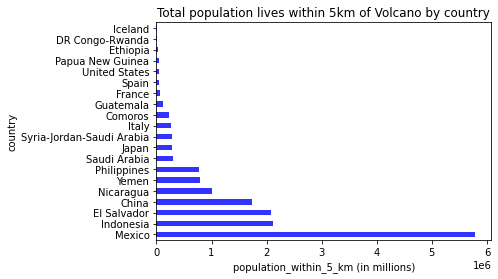

In [12]:

# plotting stack bar chart 
ax=population_top30['population_within_5_km'].plot(kind='barh', color='blue', width=.5, alpha=0.8)
ax.set_xlabel('population_within_5_km (in millions)')
ax.set_ylabel('country')
ax.set_title('Total population lives within 5km of Volcano by country')


# Transform event dataframe

In [13]:
# Create a filtered dataframe from specific columns
events_cols = ["volcano_number", "volcano_name", "eruption_number", "eruption_start_year", "event_number", "event_type", "event_date_year", "event_date_month", "event_date_day"  ]
events_df_transformed = events_df[events_cols].copy() 


In [14]:
# Clean the data by dropping duplicates and setting the index
events_df_transformed.drop_duplicates("event_number", inplace=True)
events_df_transformed.set_index("event_number", inplace=True)
events_df_transformed.dropna()


,volcano_number,volcano_name,eruption_number,eruption_start_year,event_type,event_date_year,event_date_month,event_date_day
event_number,,,,,,,,
100097,211010,Campi Flegrei,10041,1538,Fatalities,1538.0,10.0,6.0
100130,211020,Vesuvius,10050,79,Fatalities,79.0,8.0,25.0
100172,332010,Kilauea,10079,1924,Fatalities,1924.0,5.0,18.0
100460,211020,Vesuvius,13315,787,Fatalities,787.0,10.0,15.0
100492,211020,Vesuvius,13332,1631,Fatalities,1631.0,12.0,16.0
...,...,...,...,...,...,...,...,...
153194,261080,Sinabung,15404,2010,Ash Plume,2010.0,9.0,3.0
153195,261080,Sinabung,15404,2010,Explosion,2010.0,9.0,7.0
153196,261080,Sinabung,15404,2010,Ash Plume,2010.0,9.0,7.0


In [15]:
#check for occurences yearly
events_yearly = events_df_transformed['event_date_year'].value_counts().to_frame()


In [16]:
#get a feel for the data
events_df_transformed.describe()

,volcano_number,eruption_number,eruption_start_year,event_date_year,event_date_month,event_date_day
count,41322.000000,41322.000000,41322.000000,10007.000000,7132.000000,5923.000000
mean,296428.862616,15428.928029,850.534679,1365.646947,6.382081,15.461759
std,48713.188142,3190.705491,2298.526358,1707.332054,3.522029,8.959910
min,210010.000000,10001.000000,-11345.000000,-9650.000000,1.000000,1.000000
25%,263250.000000,12693.250000,1257.000000,1773.000000,3.000000,8.000000
50%,284210.000000,15334.500000,1884.000000,1912.000000,6.000000,15.000000
75%,342090.000000,18081.750000,1968.000000,1977.000000,9.000000,23.000000
max,600000.000000,22352.000000,2020.000000,2020.000000,12.000000,31.000000


In [17]:
#events after year 1800
events_df_recent = events_df_transformed.loc[events_df_transformed['event_date_year'] >= 1800]


In [18]:
#check for data after filtering by year
events_df_recent.describe()

,volcano_number,eruption_number,eruption_start_year,event_date_year,event_date_month,event_date_day
count,7287.000000,7287.000000,7287.000000,7287.000000,6329.000000,5301.000000
mean,288735.798134,15563.297379,1934.022369,1940.172087,6.378101,15.475382
std,43821.647124,3065.931252,180.124778,57.764083,3.530036,8.933085
min,211010.000000,10030.000000,-8050.000000,1800.000000,1.000000,1.000000
25%,261230.000000,13426.000000,1895.000000,1898.000000,3.000000,8.000000
50%,282110.000000,15602.000000,1952.000000,1953.000000,6.000000,15.000000
75%,332010.000000,17934.500000,1989.000000,1990.000000,10.000000,23.000000
max,390140.000000,22344.000000,2020.000000,2020.000000,12.000000,31.000000


In [19]:
#fill the null values in date to 1
events_df_fill = events_df_recent.fillna(1)

In [20]:
#covert dates
events_df_fill['event_date_year'] = events_df_fill['event_date_year'].apply(lambda x: int(x))
events_df_fill['event_date_month'] = events_df_fill['event_date_month'].apply(lambda x: int(x))
events_df_fill['event_date_day'] = events_df_fill['event_date_day'].apply(lambda x: int(x))

events_df_fill['event_date_year'] = events_df_fill['event_date_year'].astype(str)
events_df_fill['event_date_month'] = events_df_fill['event_date_month'].astype(str)
events_df_fill['event_date_day'] = events_df_fill['event_date_day'].astype(str)

events_df_fill["event_date"] = events_df_fill["event_date_year"] + '.' + events_df_fill["event_date_month"] 


In [21]:
#drop unnecessary columns
events_df_clean = events_df_fill.drop(['event_date_year','event_date_month', 'event_date_day'], axis = 1)
#final table
events_df_clean.head()

,volcano_number,volcano_name,eruption_number,eruption_start_year,event_type,event_date
event_number,,,,,,
100148,332010,Kilauea,10062,1823,Fatalities,1823.2
100172,332010,Kilauea,10079,1924,Fatalities,1924.5
100611,211020,Vesuvius,13361,1913,Fatalities,1944.3
100738,211040,Stromboli,13430,1910,Fatalities,1919.5
100893,211060,Etna,13513,1928,Fatalities,1928.11


# Transform damage dataframe

Connect to local database

In [22]:
#connection_string= "postgres:PASSWORD@localhost:5432/volcano_db"
#engine = create_engine(f'postgresql://{connection_string}')

Check for tables

In [23]:
#engine.table_names()

Use pandas to load csv converted DataFrame into database

In [24]:
#clean_eruption_data.to_sql(name='eruptions', con=engine, if_exists='append', index=True)
#events_df_clean.to_sql(name='events', con=engine, if_exists='append', index=True)
#volcano_df4.to_sql(name='volcano', con=engine, if_exists='append', index=True)
#population_df.to_sql(name='population_by_country', con=engine, if_exists='append', index=True)

 Confirm data has been added by querying  any  table

In [25]:
#pd.read_sql_query('select * from eruptions', con=engine).head()

NameError: name 'engine' is not defined